<a href="https://colab.research.google.com/github/matheusmvl01/heart_disease/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Doeças cardíacas**
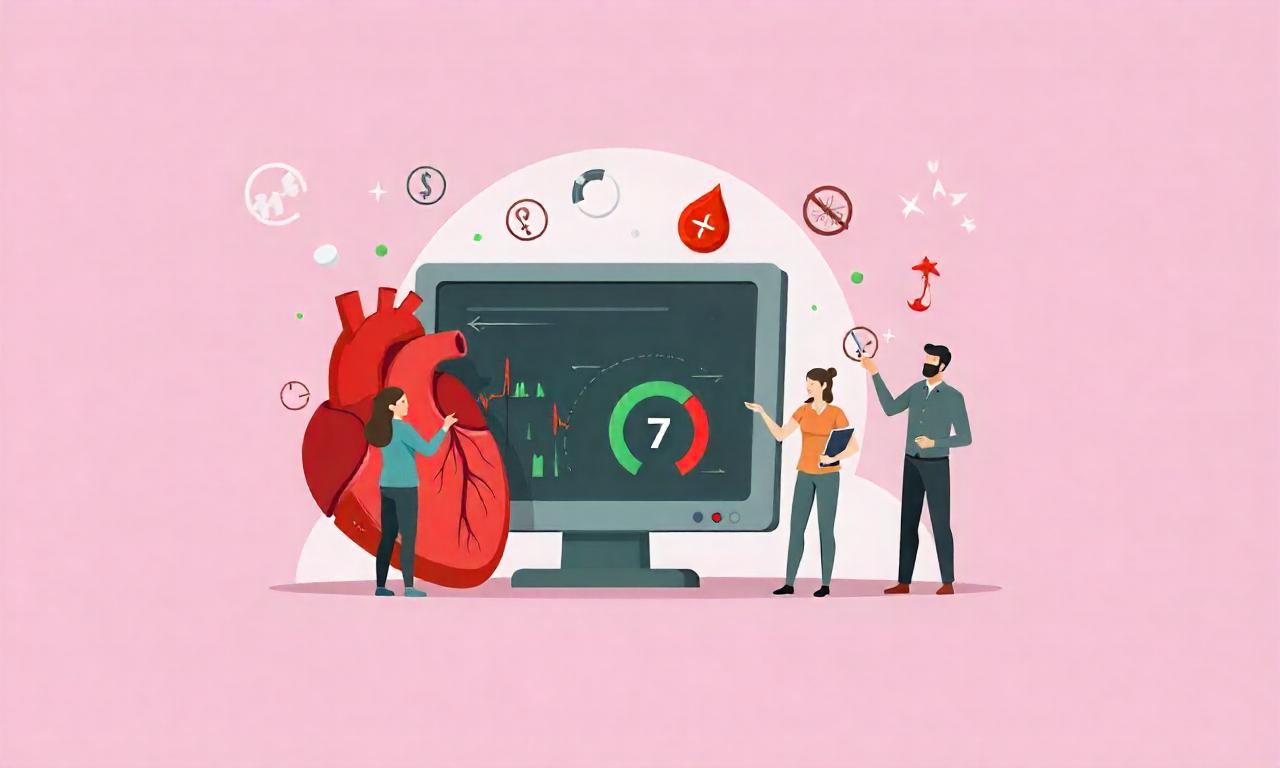

## **Objetivo do projeto**
O objetivo desse projeto é analisar os indicadores de saúde dos pacientes, comparar os indicadores para criar insight valiosos e por fim criar um modelo preditivo que classifique se um paciente possui ou não doença cardíaca analisando os indicadores dos pacientes.



## **Coleta de dados**

### **Fonte dos dados**

Os dados foram adquiridos na site da [Kaggle](https://www.kaggle.com/datasets/oktayrdeki/heart-disease) e são referentes a pacientes com doenças cardíacas.

Este conjunto de dados contém vários indicadores de saúde e fatores de risco relacionados a doenças cardíacas. Parâmetros como idade, sexo, pressão arterial, níveis de colesterol, hábitos de fumar e padrões de exercícios foram coletados para analisar o risco de doenças cardíacas e contribuir para a pesquisa em saúde.

### **Dicionário de variáveis**

* **Age**: Idade do indivíduo.

* **Gender**: O gênero do indivíduo (masculino ou feminino).

* **Blood Pressure**: Pressão arterial do indivíduo (sistólica).

* **Cholesterol Level**: nível total de colesterol do indivíduo.

* **Exercise Habits**: hábitos de exercícios do indivíduo (baixo, médio, alto).

* **Smoking**: Se o indivíduo fuma ou não (Sim ou Não).

* **Family Heart Disease**: se há histórico familiar de doença cardíaca (sim ou não).

* **Diabetes**: Se o indivíduo tem diabetes (Sim ou Não).

* **BMI**: Índice de massa corporal do indivíduo.

* **High Blood Pressure**: se o indivíduo tem pressão alta (sim ou não).

* **Low HDL Cholesterol**: se o indivíduo tem colesterol HDL baixo (sim ou não).

* **High LDL Cholesterol**: se o indivíduo tem colesterol LDL alto (sim ou não).

* **Alcohol Consumption**: nível de consumo de álcool do indivíduo (nenhum, baixo, médio, alto).

* **Stress Level**: nível de estresse do indivíduo (baixo, médio, alto).

* **Sleep Hours**: número de horas que o indivíduo dorme.

* **Sugar Consumption**: nível de consumo de açúcar do indivíduo (baixo, médio, alto).

* **Triglyceride Level**: nível de triglicerídeos do indivíduo.

* **Fasting Blood Sugar**: nível de glicemia em jejum do indivíduo.

* **CRP Level**: O nível de proteína C-reativa (um marcador de inflamação).

* **Homocysteine Level**: nível de homocisteína do indivíduo (um aminoácido que afeta a saúde dos vasos sanguíneos).

* **Heart Disease Status**: status da doença cardíaca do indivíduo (Sim ou Não)

## **Importando as bibliotecas**

Vamos começar nossa análise de dados primária, começaremos a verificando a base de dados do Dataset

In [ ]:
# importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import xgboost as xgb

### **Importando os dados**


In [39]:
# importando o dataset
df = pd.read_csv('https://raw.githubusercontent.com/matheusmvl01/heart_disease/refs/heads/main/heart_disease.csv')

# verificando as primeiras etapas
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


## **Análise  inicial**

In [ ]:
# verificando o tamanho do dataset (linhas e colunas)
print('O dataset tem o tamanho de', df.shape[0],'linhas e', df.shape[1], 'colunas.')

O dataset tem o tamanho de 10000 linhas e 21 colunas.


In [ ]:
# verificando o tipo das variaveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

## **Limpeza de dados**


In [ ]:
# verificando se temos valores ausentes
df.isna().sum()

,0
Age,29
Gender,19
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


Nota-se que temos algumas entradas vazias, a maior parte dela está na coluna "Alcohol Consumption" com 2586 valores ausentes, portanto precisamos tratar esses dados para uma melhor análise exploratória.

In [ ]:
# verificando a quantidade percentual de cada valor único
df['Alcohol Consumption'].value_counts(1)

,proportion
Alcohol Consumption,
Medium,0.340957
Low,0.337914
High,0.321129


Os valores da coluna 'Alcohol Consumption' estão divididos em 'low', 'medium' e high' e aparecem praticamente na mesma proporção, portanto preencheremos os valores ausentes da coluna 'Alcohol Consumption' com os mesmos valores 'low','medium' e 'high' e ainda respeitando a proporção original dos dados no dataframe.

In [ ]:
# tratando o valor None como ausente
df['Alcohol Consumption'] = df['Alcohol Consumption'].replace('None', pd.NA)

# Verificando a distribuição original
df2 = df['Alcohol Consumption'].value_counts(normalize=True, dropna=True)

# Preenchendo os valores ausentes respeitando a distribuição original
def preencher_valores_ausentes (series, distribution):
  categories = distribution.index
  probabilities = distribution.values
  missing_count = series.isnull().sum()
  # gerando valores aleatorios baseados na distribuição
  fill_values = pd.Series(
      np.random.choice(categories, size= missing_count, p=probabilities),
      index= series[series.isnull()].index
  )
  return series.fillna(fill_values)


# Preenchendo os valores ausentes da coluna 'Alcohol Consumption'
df['Alcohol Consumption'] = preencher_valores_ausentes(df['Alcohol Consumption'], df2)

# verificando a nova distribuição percentual da coluna alcohol consumption
df['Alcohol Consumption'].value_counts(1)

,proportion
Alcohol Consumption,
Medium,0.3405
Low,0.3379
High,0.3216


O percentual da distribuição dos valores unicos da coluna "alcohol Consumption" permaneceu identico aos valores inicias, portanto podemos continuar com a limpeza de dados das outras colunas.

In [ ]:
# verificando os valores ausentes restantes
df.isna().sum().sum()

468

Devido eu pequeno número de valores ausentes, vamos excluir o restante dos valores ausentes.

In [ ]:
# Excluindo os valores ausentes
df.dropna(axis = 0, inplace = True)

# conferindo se os valores foram excluidos
df.isna().sum().sum()
print('A partir de agora temos', df.isna().sum().sum(),'valores ausentes')

A partir de agora temos 0 valores ausentes


## **Análise univariada**

In [ ]:
# Conferindo os valores estatisticos das variaveis numéricas
df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9532.000000,9532.000000,9532.000000,9532.000000,9532.000000,9532.000000,9532.000000,9532.000000,9532.000000
mean,49.325850,149.793433,225.288397,29.057661,6.989240,250.388166,120.099350,7.462227,12.448643
std,18.205866,17.578752,43.624616,6.293722,1.752605,87.127237,23.604012,4.343354,4.318686
min,18.000000,120.000000,150.000000,18.007058,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.656482,5.449181,176.000000,99.000000,3.662392,8.723334
50%,49.000000,150.000000,225.000000,29.056969,7.000719,250.000000,120.000000,7.458804,12.398044
75%,65.000000,165.000000,263.000000,34.477519,8.532454,326.000000,141.000000,11.236785,16.129292
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


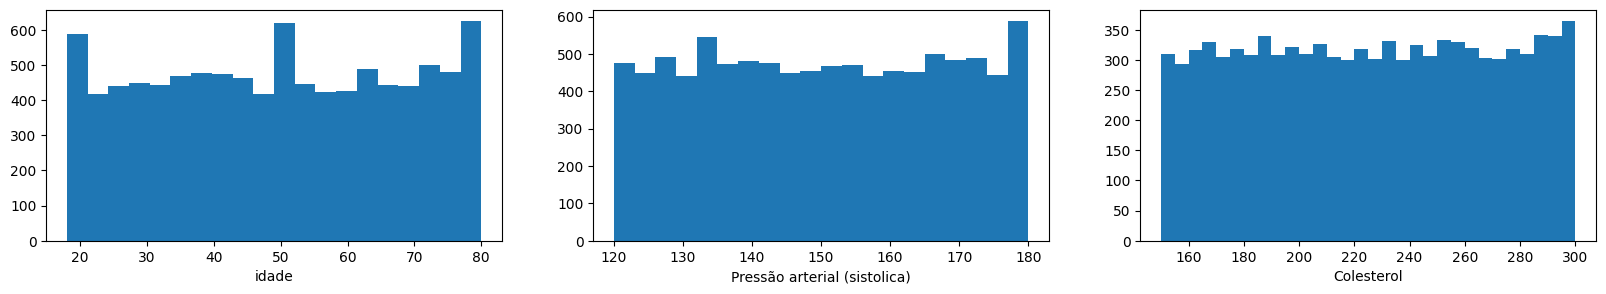

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20,3))

# Gráfico 01
ax[0].hist(df['Age'], bins = 20)
ax[0].set_xlabel('idade')

# Gráfico 02
ax[1].hist(df['Blood Pressure'], bins = 20)
ax[1].set_xlabel('Pressão arterial (sistolica)')

# Gráfico 03
ax[2].hist(df['Cholesterol Level'], bins = 30)
ax[2].set_xlabel('Colesterol')

plt.show()

* A pressão arterial sistolica acima de 140 mmHg é considerada elevada, portanto mais da metade dos pacientes tem a pressão arterial acima dos padrões normais.

* O coleterol acima de 190mg/dL é considerado elevado, portanto aproximadamente 75% dos pacientes tem o nivel de colesterol elevado.

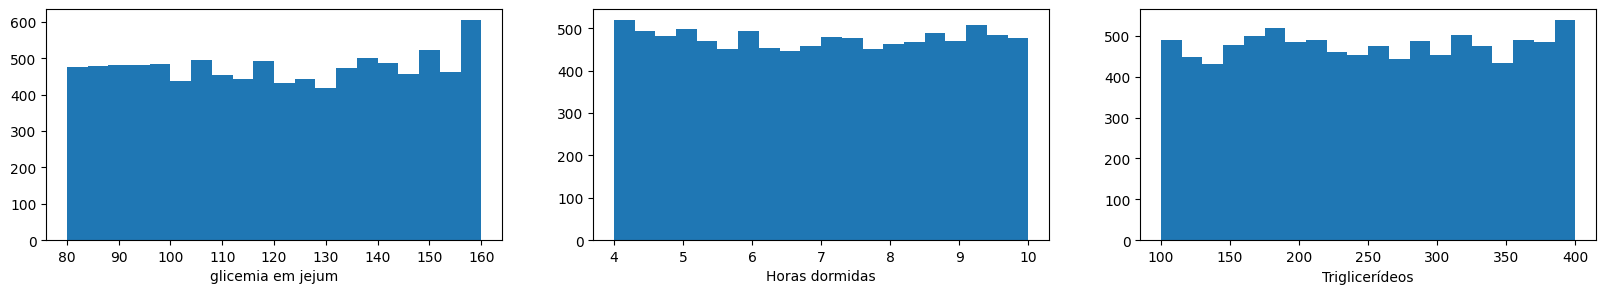

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20,3))

# Gráfico 04
ax[0].hist(df['Fasting Blood Sugar'], bins = 20)
ax[0].set_xlabel('glicemia em jejum')

# Gráfico 05
ax[1].hist(df['Sleep Hours'], bins = 20)
ax[1].set_xlabel('Horas dormidas')

# Gráfico 06
ax[2].hist(df['Triglyceride Level'], bins = 20)
ax[2].set_xlabel('Triglicerídeos')

plt.show()

* Níveis de glicemia acima de 100 mg/dL são considerados elevados, portanto aproximadamente 75% dos pacientes tem a glicemia em jejum elevada.

* Níveis de triglicerídeos acima de 150 mg/dL são considerados elevados, então mais de 75% dos pacientes tem os níveis de triglicerídeos elevados.

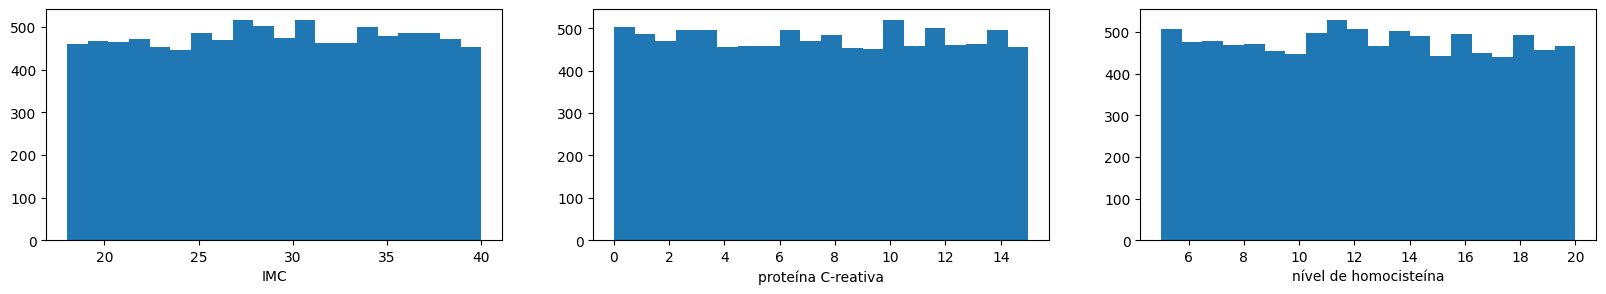

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20,3))

# Gráfico 07
ax[0].hist(df['BMI'], bins = 20)
ax[0].set_xlabel('IMC')

# Gráfico 08
ax[1].hist(df['CRP Level'], bins = 20)
ax[1].set_xlabel('proteína C-reativa')

# Gráfico 09
ax[2].hist(df['Homocysteine Level'], bins = 20)
ax[2].set_xlabel('nível de homocisteína')

plt.show()

* Pessoas com IMC acima de 25 são consideradas com sobrepeso, portanto mais de 75% das pessoas deste dataset estão acima do peso ideal.

* O nível de homocisteína acima de 15mcmol/L é considerado elevado, portanto aproximadamente 25% dos pacientes possuem o nível de homocisteína elevado.

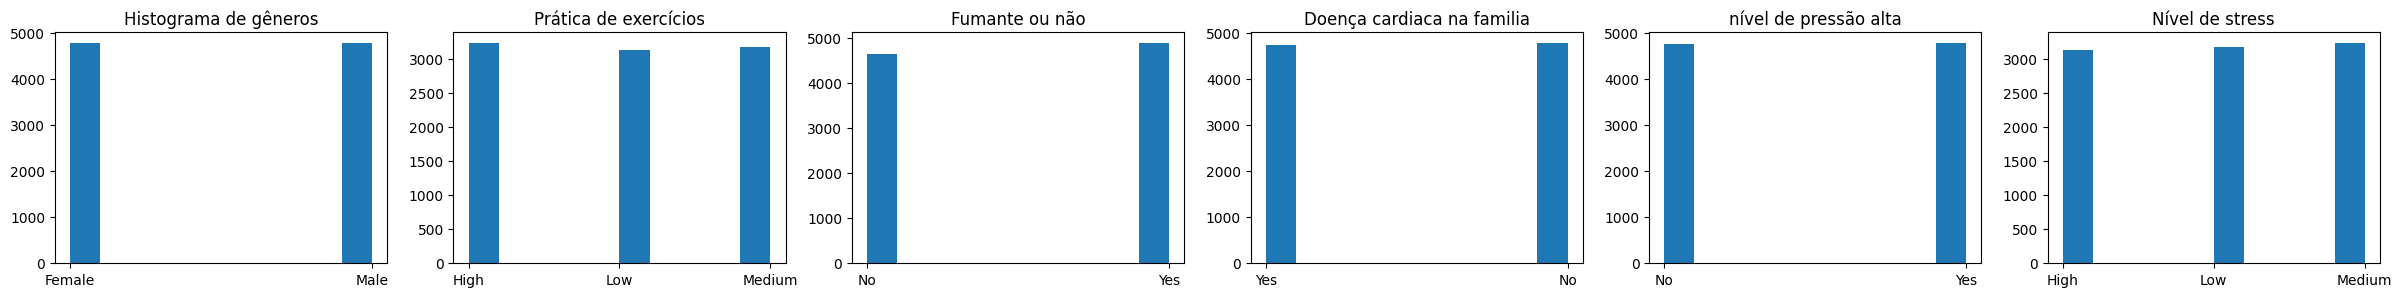

In [ ]:
# analisando as variaveis categoricas
fig, ax = plt.subplots(nrows= 1, ncols= 6, figsize = (30,3))

#df_cat = df[['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol','Alcohol Consumption', 'Stress Level', 'Sugar Consumption']]

ax[0].hist(df['Gender'])
ax[0].set_title('Histograma de gêneros')

ax[1].hist(df['Exercise Habits'])
ax[1].set_title('Prática de exercícios')


ax[2].hist(df['Smoking'])
ax[2].set_title('Fumante ou não')

ax[3].hist(df['Family Heart Disease'])
ax[3].set_title('Doença cardiaca na familia')

ax[4].hist(df['High Blood Pressure'])
ax[4].set_title('nível de pressão alta')

ax[5].hist(df['Stress Level'])
ax[5].set_title('Nível de stress')


plt.show()

## **Análise Bivariada**

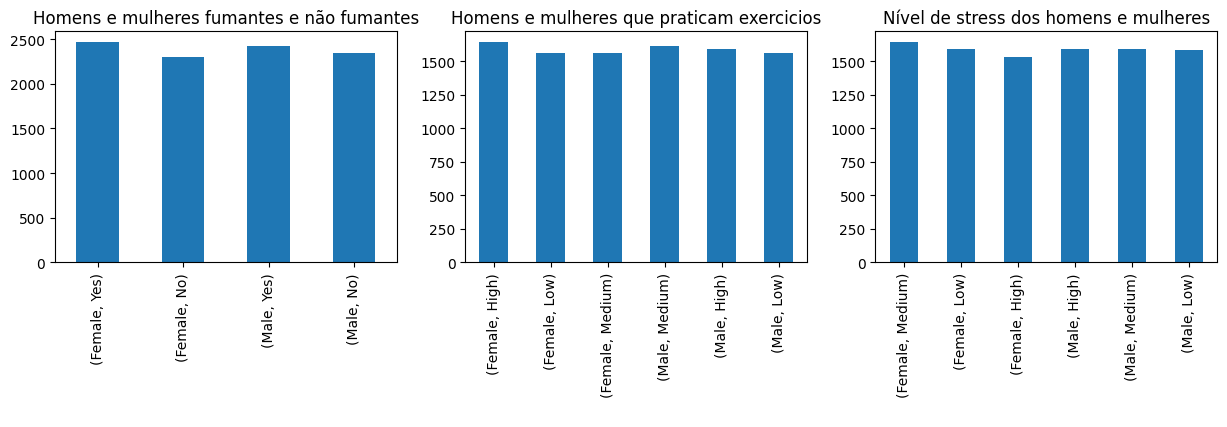

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (20,3))

# gráfico 01
df.groupby('Gender')['Smoking'].value_counts().plot.bar(title= 'Homens e mulheres fumantes e não fumantes',xlabel= ' ', ax=ax[0], figsize = (15,3))

# gráfico 02
df.groupby('Gender')['Exercise Habits'].value_counts().plot.bar(title= 'Homens e mulheres que praticam exercicios',xlabel=' ', ax=ax[1], figsize = (15,3))

# gráfico 03
df.groupby('Gender')['Stress Level'].value_counts().plot.bar(title= 'Nível de stress dos homens e mulheres',xlabel=' ', ax=ax[2], figsize = (15,3))

plt.show()

* Temos mais pessoas fumantes do que não fumantes no dataset
* Homens tem nivel de stress alto maior do que em comparação as mulheres.

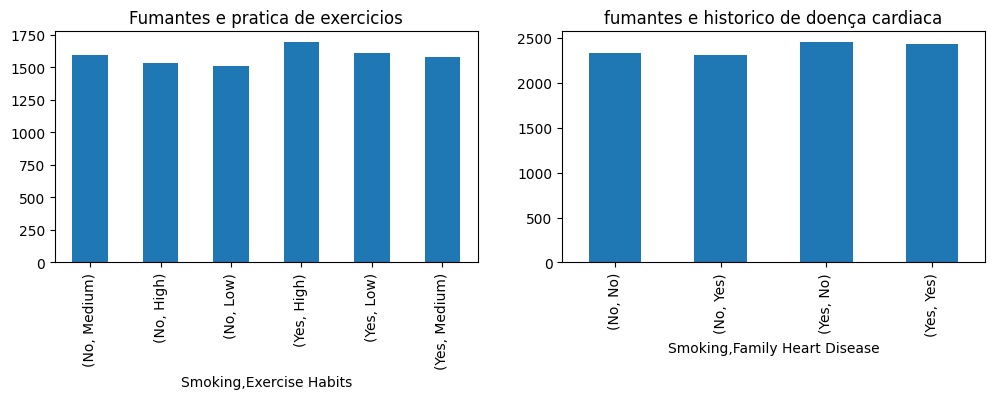

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize= (12,3))

df.groupby('Smoking')['Exercise Habits'].value_counts().plot.bar(title = 'Fumantes e pratica de exercicios', ax=ax[0])

df.groupby('Smoking')['Family Heart Disease'].value_counts().plot.bar(title='fumantes e historico de doença cardiaca', ax=ax[1])

plt.show()

* As pessoas fumantes do dataset praticam exercicios com mais frequência do que os não fumantes.

* Praticamente metades dos fumantes do dataset tem historico de doença cardíaca na familia.



## **Modelo preditivo**

In [ ]:
# separando as features por tipo
numerical_cols = df.select_dtypes(include = 'number').columns
categorical_cols = df.select_dtypes(exclude = 'number').columns

print(numerical_cols)
print(categorical_cols)

Index(['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours',
       'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level',
       'Homocysteine Level'],
      dtype='object')
Index(['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease',
       'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol',
       'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level',
       'Sugar Consumption', 'Heart Disease Status'],
      dtype='object')


In [ ]:
# Trnsformando as variaveis categoricas em valores dummies (True ou False)
df_dummies = pd.get_dummies(df, columns= categorical_cols, drop_first = True) # a função get_dummies criará novas colunas com os valores  dummies referentes as colunas categoricas
                                                                              # a função drop_first irá a coluna categorica antiga.

In [ ]:
df_dummies.head()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Gender_Male,...,High Blood Pressure_Yes,Low HDL Cholesterol_Yes,High LDL Cholesterol_Yes,Alcohol Consumption_Low,Alcohol Consumption_Medium,Stress Level_Low,Stress Level_Medium,Sugar Consumption_Low,Sugar Consumption_Medium,Heart Disease Status_Yes
1,69.0,146.0,286.0,25.221799,8.744034,133.0,157.0,9.355389,19.298875,False,...,False,True,False,False,True,False,False,False,True,False
2,46.0,126.0,216.0,29.855447,4.440440,393.0,92.0,12.709873,11.230926,True,...,False,True,True,True,False,True,False,True,False,False
3,32.0,122.0,293.0,24.130477,5.249405,293.0,94.0,12.509046,5.961958,False,...,True,False,True,True,False,False,False,False,False,False
4,60.0,166.0,242.0,20.486289,7.030971,263.0,154.0,10.381259,8.153887,True,...,True,False,False,True,False,False,False,False,False,False
5,25.0,152.0,257.0,28.144681,5.504876,126.0,91.0,4.297575,10.815983,True,...,False,False,False,True,False,False,True,True,False,False


In [ ]:
# Retirando a variavel alvo do dataset
X = df_dummies.drop('Heart Disease Status_Yes', axis = 1)

# Atribuindo a variavel ALVO
Y = df_dummies['Heart Disease Status_Yes']

In [ ]:
# Criando as features de treino e de teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 10)

In [ ]:
# Conferindo o tamanho dos data de treino
X_train.shape, Y_train.shape

((8578, 24), (8578,))

In [ ]:
# Conferindo o tamanho dos data de teste
X_test.shape, Y_test.shape

((954, 24), (954,))

In [ ]:
# criando o modelo classificatório
modelo = xgb.XGBClassifier()
modelo.fit(X_train, Y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Testando o modelo com os dados da X_test
Y_pred = modelo.predict(X_test)

In [ ]:
# Medindo a acuracia do modelo
acuracia_mod = accuracy_score(Y_test, Y_pred)

print(acuracia_mod)

0.7935010482180294


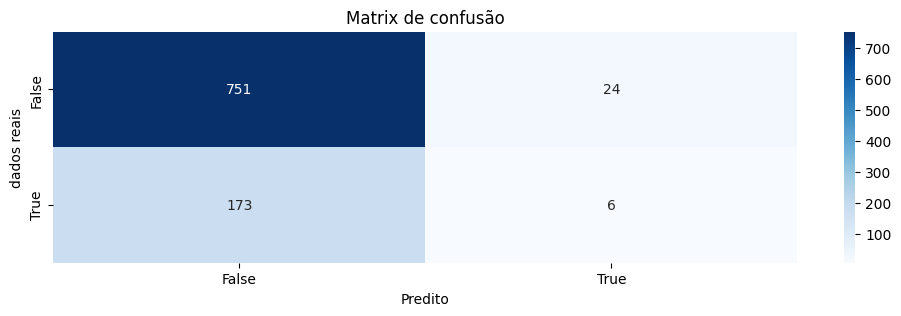

              precision    recall  f1-score   support

       False       0.81      0.97      0.88       775
        True       0.20      0.03      0.06       179

    accuracy                           0.79       954
   macro avg       0.51      0.50      0.47       954
weighted avg       0.70      0.79      0.73       954



In [ ]:
#gerar matriz de confusão
conf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(12,3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues", xticklabels = Y.unique(), yticklabels = Y.unique())

plt.xlabel('Predito')

plt.ylabel('dados reais')
plt.title('Matrix de confusão')

plt.show()

precisao = 6 / (6+24)
recall= 6 / (6+751)

print(classification_report(Y_test, Y_pred))


O modelo teve uma acurácia de 79,35%, onde teve 757 acertos  e 197 erros.

A precisão e o recall dos casos negativos é de 0.81 e 0.9 .

A precisão e o recall dos casos positivos foi 0.20 e 0.03 .

O  modelo acertou informando que 751 pacientes não tinham doenção no coração e 6 pessoas tinham doença no coração.

O modelo errou informando que 24 pacientes tinham doença no coração porém os paceintes não tinham doença no coração e 173 tinham doença no coração e o modelo informou que não tinham doença cardíaca.

## **Conclusão do Projeto: Previsão de Doenças Cardíacas**  

Este projeto de ciência de dados buscou desenvolver uma abordagem preditiva para identificar indivíduos em risco de doenças cardíacas, utilizando dados históricos de pacientes e técnicas avançadas de análise. Por meio de um processo estruturado, conseguimos não apenas criar modelos preditivos eficazes, mas também gerar insights valiosos sobre os fatores que contribuem para o desenvolvimento dessas condições.  

### **Principais Resultados**  
1. **Análise Exploratória**:  
   A análise exploratória revelou correlações importantes entre variáveis como idade, colesterol, pressão arterial e histórico familiar com a ocorrência de doenças cardíacas. Essas variáveis foram destacadas como fatores-chave para prever o risco.  
   
   Além disso, visualizações como mapas de calor e histogramas ajudaram a identificar padrões e outliers nos dados, contribuindo para uma preparação mais eficaz das variáveis para os modelos.

2. **Desempenho dos Modelos**:  
   Após a implementação de um modelo preditivo baseado em `decision treee` tivemos  os seguintes resultados:  
   - **Acurácia**: 79%  
   - **Precisão de acertos**: 20%  
   - **Recall de acertos**: 3%  
   
### **Limitações e Próximos Passos**  
Apesar do sucesso alcançado, o projeto enfrentou algumas limitações:  
- A base de dados utilizada possuia poucos casos positivos para doenças cardíacas, que prejudicou os dados para treino do modelo ocasionando numa precisão e recall abaixo do desejado.  
- A inclusão de dados adicionais, como informações genéticas ou comportamentais, poderia melhorar ainda mais a acurácia do modelo.  
- Métodos mais avançados, como redes neurais, podem ser explorados para aumentar a robustez preditiva.  

Os próximos passos incluem o refinamento do modelo, validação em novos conjuntos de dados e o desenvolvimento de uma interface prática para profissionais da saúde utilizarem as previsões no dia a dia.  

### **Impacto e Aplicações**  
O projeto demonstra como ferramentas de ciência de dados podem transformar o cuidado preventivo em saúde, auxiliando na tomada de decisão médica e reduzindo os custos associados ao tratamento tardio de doenças cardíacas. Ao identificar precocemente indivíduos em risco, é possível promover ações preventivas personalizadas, melhorando a qualidade de vida dos pacientes e reduzindo a carga sobre o sistema de saúde.  